In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
#导入数据

In [4]:
# 指定要导入的XLSX文件的文件路径
file_path = '商品销售数据.xlsx'
# 使用pandas的read_excel函数读取XLSX文件
data = pd.read_excel(file_path)

In [5]:
#数据正常 这里跳过检验 (可以用箱线图判断数据是否异常)

In [6]:
data

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape 10,April,CBD店,2.5
1,Safety 8,August,社区店,10.0
2,Safety 2,February,社区店,10.0
3,Safety 8,November,社区店,10.0
4,Tape 10,October,社区店,2.5
...,...,...,...,...
1321,Tape 10,November,社区店,2.5
1322,Safety 1,October,CBD店,12.0
1323,Safety 8,October,CBD店,10.0
1324,Tape 6,October,社区店,2.5


In [7]:
#根据销售点 总销售额

In [8]:
# 创建DataFrame
df = pd.DataFrame(data)
# 使用groupby()和sum()函数计算总销售额
total_sales = df.groupby('销售点类型')['销售额（万元）'].sum()

In [9]:
total_sales

销售点类型
CBD店    4985.5
社区店     4606.5
Name: 销售额（万元）, dtype: float64

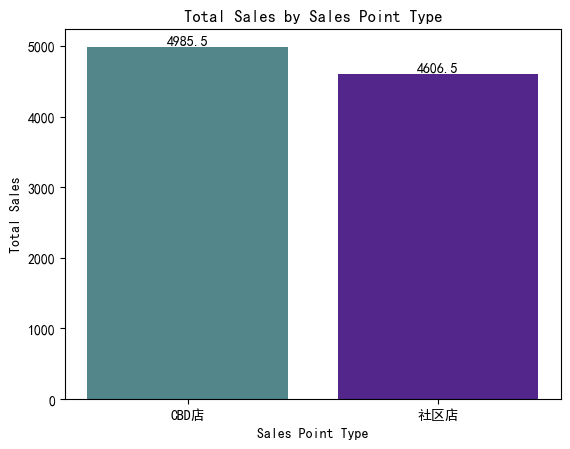

In [10]:
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

#画图
plt.bar(total_sales.index, total_sales.values,color=['#53868B','#53268B'])
plt.title('Total Sales by Sales Point Type')
plt.xlabel('Sales Point Type')
plt.ylabel('Total Sales')
# 添加数据标签
for x, y in zip(total_sales.index, total_sales.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

#plt.bar_label(label_type='edge')
# 显示柱形图
plt.show()

In [11]:
#画十二个月份的销售额柱形图 根据销售点来分

In [12]:
df

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape 10,April,CBD店,2.5
1,Safety 8,August,社区店,10.0
2,Safety 2,February,社区店,10.0
3,Safety 8,November,社区店,10.0
4,Tape 10,October,社区店,2.5
...,...,...,...,...
1321,Tape 10,November,社区店,2.5
1322,Safety 1,October,CBD店,12.0
1323,Safety 8,October,CBD店,10.0
1324,Tape 6,October,社区店,2.5


In [13]:
#CBD店和社区店不同月份销售额对比
num = pd.pivot_table(data, index='销售点类型', columns='销售月份', values='销售额（万元）',aggfunc=sum) 

C:\Users\Chc\AppData\Local\Temp\ipykernel_15416\3434160882.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  num = pd.pivot_table(data, index='销售点类型', columns='销售月份', values='销售额（万元）',aggfunc=sum)


In [14]:
num

销售月份,April,August,December,February,January,July,June,March,May,November,October,September
销售点类型,,,,,,,,,,,,
CBD店,407.0,372.5,463.0,363.0,482.0,446.0,400.5,299.0,408.5,503.5,394.0,446.5
社区店,369.5,311.5,406.0,457.0,363.0,395.0,450.0,332.0,404.5,370.0,359.0,389.0


In [15]:
import numpy as np

In [16]:
month_sort=['January','February','March','April','May','June','July','August','September','October','November','December']
#定义索引顺序
num=num[month_sort]

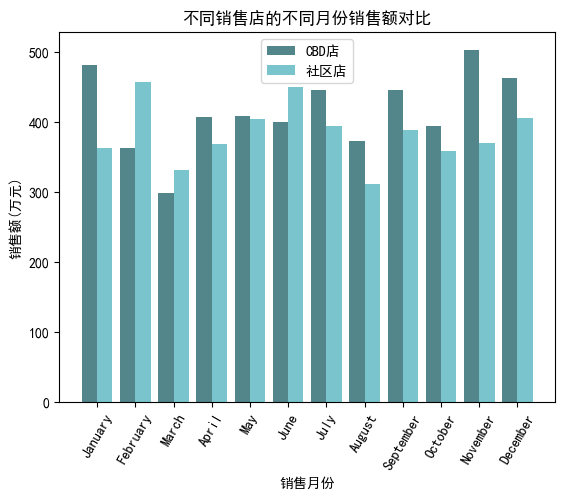

In [17]:
bar_width = 0.4
color = ['#53868B','#7AC5CD']
#编写两个柱状图的代码   enumerate是给数值填上索引顺序
for j,i in enumerate(num.index) :
    plt.bar(np.arange(12)+bar_width*j, num.loc[i,:], bar_width, label=i, color=color[j])     
    
plt.xticks(np.arange(12)+0.2, num.columns, rotation=60)  #修改x轴标签 以及替换索引名称,改变x轴标签位置
plt.xlabel('销售月份')
plt.ylabel('销售额(万元)')
plt.title('不同销售店的不同月份销售额对比')
plt.legend()
plt.show()

In [55]:
num.T.describe()

销售点类型,CBD店,社区店
count,12.000000,12.000000
mean,415.458333,383.875000
std,56.648621,42.818393
min,299.000000,311.500000
25%,388.625000,362.000000
50%,407.750000,379.500000
75%,450.625000,404.875000
max,503.500000,457.000000


In [58]:
ind = ['mean','std','min','max']
num1=num.T.describe().loc[ind, :].T
num1

,mean,std,min,max
销售点类型,,,,
CBD店,415.458333,56.648621,299.0,503.5
社区店,383.875000,42.818393,311.5,457.0


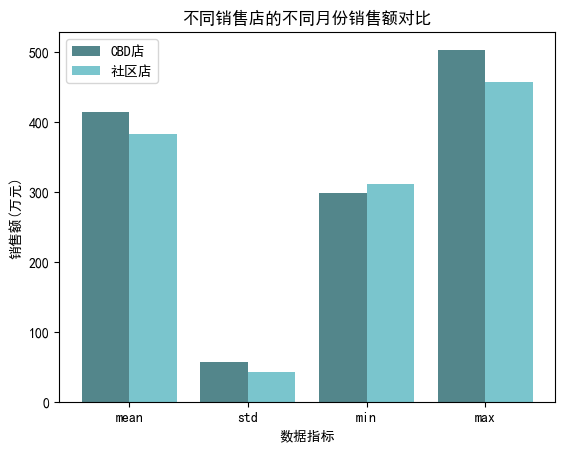

In [62]:
bar_width = 0.4
color = ['#53868B','#7AC5CD']
#编写两个柱状图的代码   enumerate是给数值填上索引顺序
for j,i in enumerate(num1.index) :
    plt.bar(np.arange(4)+bar_width*j, num1.loc[i,:], bar_width, label=i, color=color[j])     
    
plt.xticks(np.arange(4)+0.2, num1.columns)  #修改x轴标签 以及替换索引名称
plt.xlabel('数据指标')
plt.ylabel('销售额(万元)')
plt.title('不同销售店的不同月份销售额对比')
plt.legend()
plt.show()

In [64]:
#根据商品类型的销售额 按月份来分

In [11]:
# 将英文月份转换为月份序号
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['销售月份'] = df['销售月份'].map(month_to_number)

In [12]:
#设置空值为0
df['销售额（万元）'] = df['销售额（万元）'].fillna(0)

In [13]:
df['销售额（万元）']

0        2.5
1       10.0
2       10.0
3       10.0
4        2.5
        ... 
1321     2.5
1322    12.0
1323    10.0
1324     2.5
1325    10.0
Name: 销售额（万元）, Length: 1326, dtype: float64

In [34]:
# 使用groupby()和sum()函数计算各商品总销售额
product_total_sales = df.groupby(['商品代号','销售月份'])['销售额（万元）'].sum()

In [37]:
# 重塑数据框以使商品代号成为列
product_total_sales = product_total_sales.unstack(level=0)

In [38]:
print(product_total_sales)

商品代号  Adhesive 1  Adhesive 10  Adhesive 2  Adhesive 3  Adhesive 4  Adhesive 5  \
销售月份                                                                            
1            NaN          7.0         7.0         NaN        21.0        21.0   
2            NaN         14.0         7.0         7.0        28.0        14.0   
3            NaN          NaN         NaN         7.0        35.0        21.0   
4            NaN          7.0         NaN         NaN        14.0        35.0   
5            NaN          NaN        14.0         7.0        21.0        14.0   
6            NaN          NaN         NaN         NaN        35.0        14.0   
7            NaN          NaN         7.0        14.0        21.0        28.0   
8            NaN          7.0         7.0         7.0        28.0         NaN   
9            8.0          7.0         NaN         7.0         NaN         7.0   
10           8.0          7.0        14.0         NaN         7.0        14.0   
11           NaN         14.

In [22]:
subcategory_to_category = {
    'Adhesive 1': 'Adhesive',
    'Adhesive 2': 'Adhesive',
    'Adhesive 3': 'Adhesive',
    'Adhesive 4': 'Adhesive',
    'Adhesive 5': 'Adhesive',
    'Adhesive 6': 'Adhesive',
    'Adhesive 7': 'Adhesive',
    'Adhesive 8': 'Adhesive',
    'Adhesive 9': 'Adhesive',
    'Adhesive 10': 'Adhesive',
    
    'Tape 1': 'Tape',
    'Tape 2': 'Tape',
    'Tape 3': 'Tape',
    'Tape 4': 'Tape',
    'Tape 5': 'Tape',
    'Tape 6': 'Tape',
    'Tape 7': 'Tape',
    'Tape 8': 'Tape',
    'Tape 9': 'Tape',
    'Tape 10': 'Tape',

    'Safety 1': 'Safety',
    'Safety 2': 'Safety',
    'Safety 3': 'Safety',
    'Safety 4': 'Safety',
    'Safety 5': 'Safety',
    'Safety 6': 'Safety',
    'Safety 7': 'Safety',
    'Safety 8': 'Safety',
    'Safety 9': 'Safety',
    'Safety 10': 'Safety',
}


In [24]:
df['商品大类'] = df['商品代号'].map(subcategory_to_category)


In [39]:
## 使用groupby()和sum()函数计算各大类商品总销售额
productmax_total_sales = df.groupby(['商品大类','销售月份'])['销售额（万元）'].sum()

In [40]:
print(productmax_total_sales)

商品大类      销售月份
Adhesive  1        56.0
          2        84.0
          3       105.0
          4        63.0
          5        63.0
          6        91.0
          7        98.0
          8        63.0
          9        36.0
          10       85.0
          11       56.0
          12       57.0
Safety    1       698.0
          2       652.0
          3       440.0
          4       628.0
          5       654.0
          6       658.0
          7       642.0
          8       516.0
          9       692.0
          10      572.0
          11      686.0
          12      734.0
Tape      1        91.0
          2        84.0
          3        86.0
          4        85.5
          5        96.0
          6       101.5
          7       101.0
          8       105.0
          9       107.5
          10       96.0
          11      131.5
          12       78.0
Name: 销售额（万元）, dtype: float64


In [55]:
#查看各个季节的总销售额

In [61]:
# 将英文月份转换为月份序号
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['销售月份'] = df['销售月份'].map(month_to_number) #将月份映射入表里

# 定义季节与月份的映射关系
seasons = {
    'Spring': [3, 4, 5],     # 春季：3月、4月、5月
    'Summer': [6, 7, 8],     # 夏季：6月、7月、8月
    'Autumn': [9, 10, 11],   # 秋季：9月、10月、11月
    'Winter': [12, 1, 2]     # 冬季：12月、1月、2月
}

# 根据月份序号将数据分为四个季节
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

df['季节'] = df['销售月份'].apply(get_season) #将数据映射在表里面 加了新列



# 按季节计算总销售额
total_sales_by_season = df.groupby(['商品代号','季节'])['销售额（万元）'].sum()
# 重塑数据框以使商品代号成为列
total_sales_by_season = total_sales_by_season.unstack(level=0)
# 打印每个季节的商品的总销售额
print(total_sales_by_season)

商品代号    Adhesive 1  Adhesive 10  Adhesive 2  Adhesive 3  Adhesive 4  \
季节                                                                    
Autumn        16.0         28.0        14.0         7.0        28.0   
Spring         NaN          7.0        14.0        14.0        70.0   
Summer         NaN          7.0        14.0        21.0        84.0   
Winter         8.0         28.0        21.0         7.0        56.0   

商品代号    Adhesive 5  Adhesive 6  Adhesive 7  Adhesive 8  Adhesive 9  ...  \
季节                                                                  ...   
Autumn        21.0         7.0        14.0         7.0        35.0  ...   
Spring        70.0         NaN        14.0        14.0        28.0  ...   
Summer        42.0        14.0        35.0        14.0        21.0  ...   
Winter        35.0        21.0         7.0         7.0         7.0  ...   

商品代号    Tape 1  Tape 10  Tape 2  Tape 3  Tape 4  Tape 5  Tape 6  Tape 7  \
季节                                             